# Mobile Robotics

Lecturer: Prof. Baum \
Tutor: Kolja Thormann and Simon Steuernagel\
Semester: Summer 22

## MC Integration

In [1]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True

from matplotlib import pyplot as plt
import math as math
import numpy as np

In [2]:
def f(x):
    y = x**3 - x + 1
    return y

### a) Use Monte Carlo integration to solve the integral $\int_{-2}^{2}(x^3-x+1)\text{d}x$. Utilize a uniform distribution between $-2$ and $2$ as the importance density.

In [3]:
def mc_integral(func, nr_samples, l_bound, u_bound):
    # === YOUR CODE HERE ===
    
    RNG = np.random.default_rng()
    x = RNG.uniform(l_bound, u_bound, nr_samples)
    mc_integral = (u_bound-l_bound) * (1 / nr_samples) * sum(func(x))
    return mc_integral

    # === END OF YOUR CODE ===

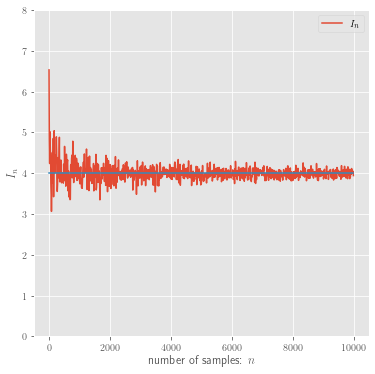

In [4]:
# plot the estiamtes in terms of number of samples
nr_samples_array = range(1, 10000, 10)
estimate = np.empty(np.size(nr_samples_array))
for ind, n in enumerate(nr_samples_array):
    estimate[ind] = mc_integral(f, n, -2, 2)

plt.style.use('ggplot')

plt.plot(nr_samples_array, estimate, label='$I_n$')
plt.plot(nr_samples_array, 4 * np.ones(np.size(nr_samples_array)))

# figure setting
plt.xlabel('number of samples: $n$')
plt.ylabel('$I_n$')
plt.ylim(0, 8)
plt.legend()
plt.gcf().set_size_inches(6, 6)

### b) Given the true integral being $\int_{-2}^{2}(x^3-x+1)\text{d}x=4$, plot the estimation error and variance and show the Monte Carlo integration estimator to be unbiased.

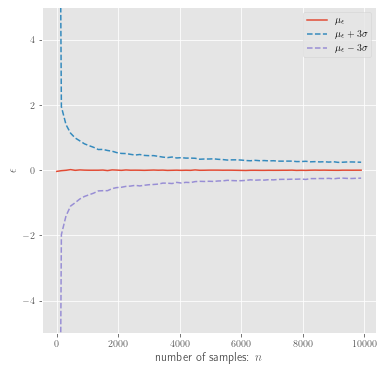

In [5]:
nr_samples_array_coarse = range(1, 10000, 150)
nr_estimates = 1000  # for a fixed n, we estimate 100 times to get the variance / standard deviation 

# locate memory 
estimates = np.empty(nr_estimates)
mu_error = np.empty(np.size(nr_samples_array_coarse))
sd = np.empty(np.size(nr_samples_array_coarse))

# === YOUR CODE HERE ===

for ind, n in enumerate(nr_samples_array_coarse):
    for ite in range(nr_estimates):
        estimates[ite] = mc_integral(f, n, -2, 2)
    mu_error[ind] = np.mean(estimates - 4)
    sd[ind] = math.sqrt(np.var(estimates - 4))

# === END OF YOUR CODE ===

# plot the estimates in terms of number of samples
plt.plot(nr_samples_array_coarse, mu_error, label='$\mu_{\epsilon}$')
plt.plot(nr_samples_array_coarse,
         mu_error + 3 * sd,
         '--',
         label='$\mu_{\epsilon}+3\sigma$')
plt.plot(nr_samples_array_coarse,
         mu_error - 3 * sd,
         '--',
         label='$\mu_{\epsilon}-3\sigma$')


plt.ylim(-5, 5)
plt.xlabel('number of samples: $n$')
plt.ylabel('$\epsilon$')
plt.legend()
plt.gcf().set_size_inches(6, 6)

### c) Show the standard deviation of the estimation error decreases at rate of $\frac{1}{\sqrt{n}}$.

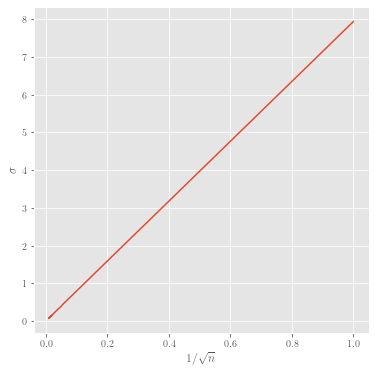

In [6]:
# visulize the relationship between 1/sqrt(n) and standard deviation

# === YOUR CODE HERE ===

plt.plot([1 / math.sqrt(i) for i in nr_samples_array_coarse], sd)

# === END OF YOUR CODE ===

plt.xlabel('$1/\sqrt{n}$')
plt.ylabel('$\sigma$')
plt.gcf().set_size_inches(6, 6)